## Life Exectancy 1800 - 2016

Within this notebook, I will be analysing the average life expectancy since 1800 - 2016.

I will:
- Visualise the changes and fluctuations in life expectancy throughout history.
- I will aim to contextualise any anomalies from the trend.
- Compare the wealthiest and poorest nations in terms of life expenctancy. Find a trend whether higher GDP nations lead to a better quality of life. 
- Compare the top 3 nations of each continent (GDP per capita), and compare the life expectancy over each continent.  

#### Set-up

In [46]:
#Import Libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as mpy
import seaborn as sns
import numpy as np
import time
import datetime as dt

In [47]:
#Import data
ledb = pd.read_csv("D:\PROJECTS\Life Expectancy 1800 - 2016 ✔\indicator-life_expectancy_at_birth ORIGINAL.csv")
ledb_comp = pd.read_csv("D:\PROJECTS\Life Expectancy 1800 - 2016 ✔\life-expectancy - global ORIGINAL.csv")

In [48]:
ledb

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
ledb_comp

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


In [50]:
cols = ledb_comp.columns
cols

Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')

#### Data Manipulation/Cleaning

In [51]:
##Check for null values
ledb.isnull().sum()

country     0
1800       59
1801       59
1802       59
1803       59
           ..
2012       52
2013       52
2014       52
2015       52
2016       52
Length: 218, dtype: int64

In [52]:
##Fill null values
ledb_na = ledb.fillna('-')
ledb_na

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,76.6,76.8,77,77.2,77.4,77.5,77.7,77.9,78,78.1
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76,76.1,76.2,76.3,76.3,76.4,76.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
256,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,49,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.1
257,Zimbabwe,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,...,46.4,47.3,48,49.1,51.6,54.2,55.7,57,59.3,61.69
258,Åland,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [53]:
ledb_comp = ledb_comp.replace('United States', 'United_States')
ledb_comp = ledb_comp.replace('New Zealand', 'New_Zealand')
ledb_comp = ledb_comp.replace('South Africa', 'South_Africa')

In [54]:
countries = ledb_comp.Entity.unique()
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equ

In [55]:
##Extract mean life expectancy per year for visualisation of the global life expectancy growth
avg_global = ledb.describe()
avg_global = avg_global.loc[['mean']]

#Convert table into an array
avg_global = np.array(avg_global)

In [56]:
##Sum null value count in 2nd dataset
ledb_comp.isnull().sum()

Entity               0
Code               583
Year                 0
Life expectancy      0
dtype: int64

In [57]:
##Fill null values 
ledb_comp = ledb_comp.fillna('N/A')

In [58]:
cols

Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')

In [59]:
##Rename column names 
ledb_comp.rename(columns={'Life expectancy': 'Life_expectancy'}, inplace=True)

In [60]:
ledb_comp

,Entity,Code,Year,Life_expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


### Data Visualisation

In [61]:
##Summarise quantitative values
ledb.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,64.825000,64.875000,65.225000,65.475000,65.600000,66.075000,66.475000,66.775000,67.05000,67.175000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,72.750000,73.000000,73.350000,73.700000,73.750000,74.050000,74.150000,74.300000,74.40000,74.500000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,76.925000,77.150000,77.425000,77.650000,77.825000,78.125000,78.300000,78.400000,78.50000,78.650000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,84.500000,84.600000,84.600000,84.700000,84.700000,84.700000,84.800000,84.800000,84.80000,84.800000


#### Global life expectancy 1800 - 2016

In [62]:
x = np.arange(2017)
years = x[1800:2017]

In [63]:
avg_global

array([[31.4860199 , 31.44890547, 31.46348259, 31.37741294, 31.44631841,
        31.56253731, 31.61597015, 31.57313433, 31.37676617, 31.31044776,
        31.52174129, 31.48189055, 31.47273632, 31.46721393, 31.51631841,
        31.64741294, 31.62751244, 31.72154229, 31.57472637, 31.48860697,
        31.56079602, 31.62059701, 31.72208955, 31.77064677, 31.70900498,
        31.66681592, 31.59731343, 31.63358209, 31.5778607 , 31.55995025,
        31.6400995 , 31.60477612, 31.56920398, 31.56432836, 31.55199005,
        31.67442786, 31.64069652, 31.58064677, 31.64129353, 31.63174129,
        31.71422886, 31.72960199, 31.7341791 , 31.71910448, 31.77810945,
        31.82547264, 31.54716418, 31.61900498, 31.61671642, 31.46606965,
        31.63572139, 31.77298507, 31.7858209 , 31.78462687, 31.57308458,
        31.70472637, 31.71626866, 31.71825871, 31.72353234, 31.69313433,
        31.76572139, 31.73427861, 31.67059701, 31.72154229, 31.65477612,
        31.61537313, 31.50114428, 31.50950249, 31.2

In [64]:
avg_global.shape

(1, 217)

In [65]:
global_le = np.array([31.4860199 , 31.44890547, 31.46348259, 31.37741294, 31.44631841,
        31.56253731, 31.61597015, 31.57313433, 31.37676617, 31.31044776,
        31.52174129, 31.48189055, 31.47273632, 31.46721393, 31.51631841,
        31.64741294, 31.62751244, 31.72154229, 31.57472637, 31.48860697,
        31.56079602, 31.62059701, 31.72208955, 31.77064677, 31.70900498,
        31.66681592, 31.59731343, 31.63358209, 31.5778607 , 31.55995025,
        31.6400995 , 31.60477612, 31.56920398, 31.56432836, 31.55199005,
        31.67442786, 31.64069652, 31.58064677, 31.64129353, 31.63174129,
        31.71422886, 31.72960199, 31.7341791 , 31.71910448, 31.77810945,
        31.82547264, 31.54716418, 31.61900498, 31.61671642, 31.46606965,
        31.63572139, 31.77298507, 31.7858209 , 31.78462687, 31.57308458,
        31.70472637, 31.71626866, 31.71825871, 31.72353234, 31.69313433,
        31.76572139, 31.73427861, 31.67059701, 31.72154229, 31.65477612,
        31.61537313, 31.50114428, 31.50950249, 31.25278607, 31.55179104,
        31.7739801 , 31.71069652, 31.7818408 , 31.85079602, 31.89512438,
        31.77562189, 31.95457711, 32.02059701, 31.96706468, 32.12542289,
        32.1160199 , 32.16298507, 32.10303483, 32.2379602 , 32.36711443,
        32.41761194, 32.46328358, 32.50457711, 32.53004975, 32.51114428,
        32.29104478, 32.47537313, 32.47840796, 32.53308458, 32.74721393,
        32.8118408 , 32.89522388, 32.96427861, 32.9940796 , 32.96298507,
        33.01338308, 33.18024876, 33.25567164, 33.26746269, 33.31104478,
        33.34810945, 33.4561194 , 33.56616915, 33.66716418, 33.89875622,
        34.03502488, 34.1379602 , 34.33437811, 34.34258706, 34.08069652,
        33.71631841, 33.81412935, 33.66228856, 22.2921393 , 33.769801  ,
        33.97532338, 34.43004975, 34.77472637, 35.47875622, 35.76895522,
        35.94393035, 36.35378109, 36.55079602, 36.88109453, 36.92855721,
        37.40895522, 37.41766169, 37.44039801, 37.270199  , 38.72363184,
        39.11462687, 39.59726368, 39.91860697, 40.44293532, 40.91283582,
        40.90089552, 39.60940299, 39.49726368, 39.33741294, 39.12497512,
        40.94522388, 44.31641791, 44.87860697, 46.94870647, 48.06383085,
        49.25975248, 49.50851485, 50.15594059, 50.82287129, 51.51064356,
        52.10415842, 52.65415842, 53.13054455, 53.74242574, 54.18747525,
        54.73282178, 55.2420297 , 55.69584158, 56.2150495 , 56.73742574,
        57.13509901, 57.57252475, 58.01762376, 58.39044554, 58.75915842,
        59.23856436, 59.67975248, 60.10425743, 60.48391089, 60.87163366,
        61.19965347, 61.61168317, 62.03108911, 62.42      , 62.83029703,
        63.22044554, 63.65777228, 64.08361386, 64.44564356, 64.81445545,
        65.13168317, 65.54579208, 65.86806931, 66.14440594, 66.40247525,
        66.78461538, 66.84466346, 67.026875  , 67.0925    , 67.00610577,
        67.22      , 67.41240385, 67.62354067, 67.7623445 , 67.93488038,
        68.07770335, 68.43794258, 68.65325359, 68.93555024, 69.18421053,
        69.52401914, 69.85019048, 70.13971154, 70.44716346, 70.76774038,
        70.96990385, 71.324375  , 71.66307692, 71.91610577, 72.088125  ,
        72.32100962, 72.55663462])

In [66]:
years.shape

(217,)

In [67]:
global_le.shape

(217,)

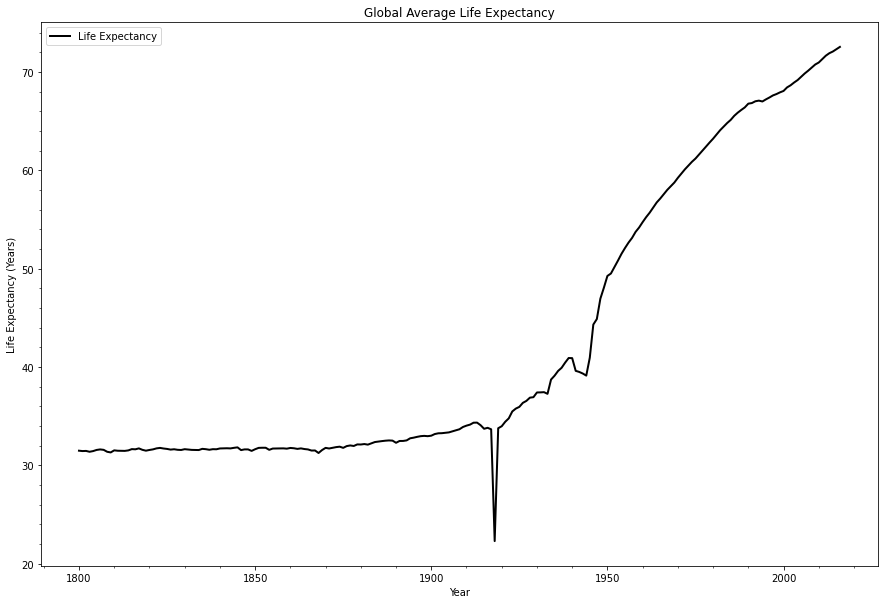

In [68]:
#Provide values
glb_xvalues = years
glb_yvalues = global_le
#Set Size
mpy.figure(figsize=(15,10))


#Plot Data 
global_le = mpy.plot(glb_xvalues, glb_yvalues, linewidth = 2, color= 'black')

mpy.minorticks_on()
mpy.xlabel('Year')
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Global Average Life Expectancy')
mpy.legend(['Life Expectancy'], ncol=1, loc='upper left')

The graph above represents the life expectancy from 1800 - 2016.

We can infer that the general trend is that the average life expectancy is growing, due to improved medicine, better common hygiene, quality of food, quality of water, better housing and more. 

The Spanish Flu was responsible for the steep decline, taking the lives of ~50 million people over its reign of carnage. 

From 1918 - 1920, there is an extreme outlier from the trend. The average life expectancy dropped drastically, from ~34  in 1917, dropping to ~23 in the trough of the decline. The Spanish Flu was accountable for the steep decline, taking the lives of ~50 million people and infecting ~500 million people, from 1918 - 1920.

The decline recovered in 1920 and continued the general up-trend.

### How do the wealthiest nations compare to the poorest? Does GDP/Wealth (Per Capita) indicate higher life expectancy?

I will compare the life expectancies top 5 wealthies and poorest nations (relative to GDP per capita)
Top 5 Wealthiest Nations:
1. Luxembourg (GDP per capita: $119,719)

2. Norway (GDP per capita: $86,362)

3. Switzerland (GDP per capita: $83,832)

4. Ireland (GDP per capita: $81,477)

5. Iceland (GDP per capita: $78,181)

Top 5 Poorest Nations: 
1. Democratic Republic of Congo (GDP per capita: $500)

2. Mozambique (GDP per capita: $514)

3. Uganda (GDP per capita: $798)

4. Tajikistan (GDP per capita: $928)

5. Yemen (GDP per capita: $996)


** Richest nation data gathered from World Population Review: https://worldpopulationreview.com/country-rankings/richest-countries-in-the-world

** Poorest nation data gathered from Focus Economics: https://www.focus-economics.com/blog/the-poorest-countries-in-the-world

** Data relative to 2020 

In [69]:
cols

Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')

In [70]:
#Top 5 RICHEST
LUX = ledb_comp.loc[ledb_comp['Entity'] == 'Luxembourg']
NOR = ledb_comp.loc[ledb_comp['Entity'] == 'Norway'] 
SWI = ledb_comp.loc[ledb_comp['Entity'] == 'Switzerland'] 
IRE = ledb_comp.loc[ledb_comp['Entity'] == 'Ireland']
ICE = ledb_comp.loc[ledb_comp['Entity'] == 'Iceland']

#Top 5 POOREST
DRC = ledb_comp.loc[ledb_comp['Entity'] == 'Congo']
MOZ = ledb_comp.loc[ledb_comp['Entity'] == 'Mozambique']
UGA = ledb_comp.loc[ledb_comp['Entity'] == 'Uganda']
TAJ = ledb_comp.loc[ledb_comp['Entity'] == 'Tajikistan']
YEM = ledb_comp.loc[ledb_comp['Entity'] == 'Yemen']

In [71]:
IRE

,Entity,Code,Year,Life_expectancy
8057,Ireland,IRL,1901,49.400002
8058,Ireland,IRL,1911,53.799999
8059,Ireland,IRL,1926,57.599998
8060,Ireland,IRL,1936,58.900002
8061,Ireland,IRL,1941,60.000000
...,...,...,...,...
8128,Ireland,IRL,2015,81.344000
8129,Ireland,IRL,2016,81.615000
8130,Ireland,IRL,2017,81.872000
8131,Ireland,IRL,2018,82.103000


In [72]:
#Extract 'Life expectancy' values, then convert table into an array
LUX_le = LUX['Life_expectancy']
LUX_le = np.array(LUX_le)
NOR_le = NOR['Life_expectancy']
NOR_le = np.array(NOR_le)
SWI_le = SWI['Life_expectancy']
SWI_le = np.array(SWI_le)
IRE_le = IRE['Life_expectancy']
IRE_le = np.array(IRE_le)
ICE_le = ICE['Life_expectancy']
ICE_le = np.array(ICE_le)

DRC_le = DRC['Life_expectancy']
DRC_le = np.array(DRC_le)
MOZ_le = MOZ['Life_expectancy']
MOZ_le = np.array(MOZ_le)
UGA_le = UGA['Life_expectancy']
UGA_le = np.array(UGA_le)
TAJ_le = TAJ['Life_expectancy']
TAJ_le = np.array(TAJ_le)
YEM_le = YEM['Life_expectancy']
YEM_le = np.array(YEM_le)

In [73]:
y = np.arange(2020)
yearsLUX = y[1900:2019]
yearsNOR = y[1845:2019]
yearsSWI = y[1875:2019]
yearsIRE = y[1943:2019]
yearsICE = y[1837:2019]

yearsDRC = y[1949:2019]
yearsMOZ = y[1949:2019]
yearsUGA = y[1946:2019]
yearsTAJ = y[1949:2019]
yearsYEM = y[1949:2019]

<ipython-input-74-b81aa25a263d>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  mpy.subplot()


Text(0.5, 1.0, 'Global Average Life Expectancy - Bottom 5 GDP')

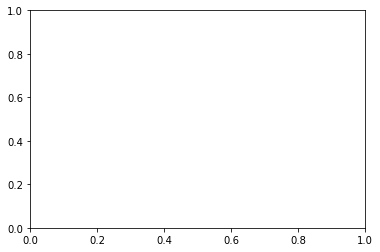

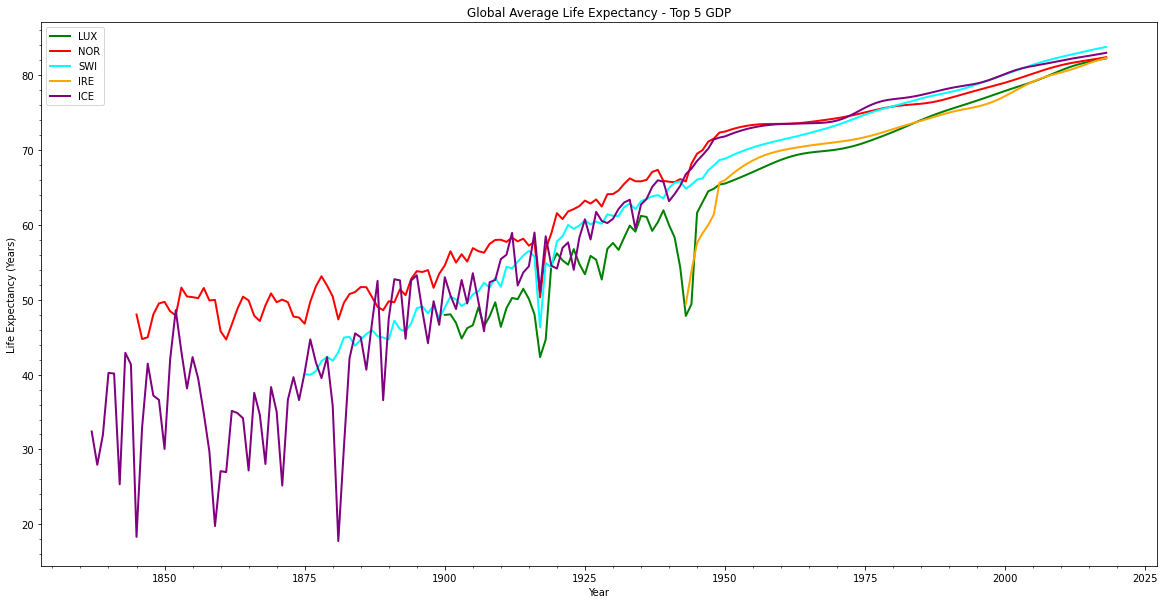

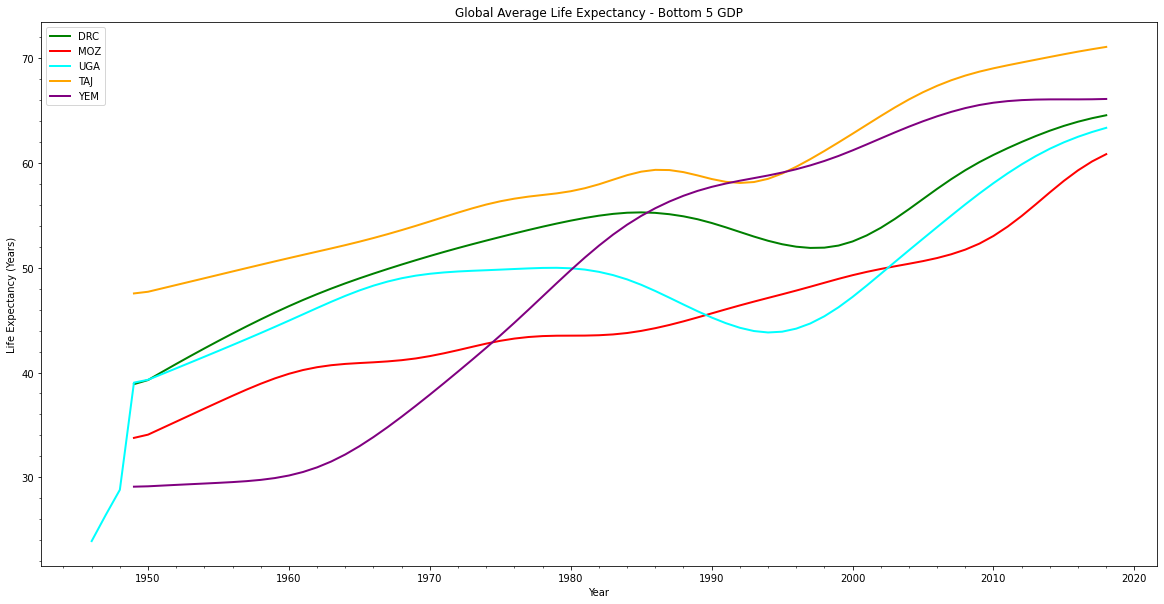

In [74]:
###Plot Data 

##SUBPLOT 1 - HIGHEST GDP
mpy.subplot()

#Input Values
yearLUX_xvalues = yearsLUX
yearNOR_xvalues = yearsNOR
yearSWI_xvalues = yearsSWI
yearIRE_xvalues = yearsIRE
yearICE_xvalues = yearsICE
lux_yvalues = LUX_le
nor_yvalues = NOR_le
swi_yvalues = SWI_le
ire_yvalues = IRE_le
ice_yvalues = ICE_le

#Set Size
mpy.figure(figsize=(20,10))

#Plot Data 
plot_lux = mpy.plot(yearLUX_xvalues, lux_yvalues, linewidth = 2, color= 'green', )
plot_nor = mpy.plot(yearNOR_xvalues, nor_yvalues, linewidth = 2, color= 'red')
plot_swi = mpy.plot(yearSWI_xvalues, swi_yvalues, linewidth = 2, color= 'cyan')
plot_ire = mpy.plot(yearIRE_xvalues, ire_yvalues, linewidth = 2, color= 'orange')
plot_ice = mpy.plot(yearICE_xvalues, ice_yvalues, linewidth = 2, color= 'purple')

mpy.legend(['LUX', 'NOR', 'SWI', 'IRE', 'ICE'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.xlabel('Year')
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Global Average Life Expectancy - Top 5 GDP')

##SUBPLOT 2 - LOWEST GDP
mpy.subplot()

#Input Values 
yearDRC_xvalues = yearsDRC
yearMOZ_xvalues = yearsMOZ
yearUGA_xvalues = yearsUGA
yearTAJ_xvalues = yearsTAJ
yearYEM_xvalues = yearsYEM
DRC_yvalues = DRC_le
MOZ_yvalues = MOZ_le
UGA_yvalues = UGA_le
TAJ_yvalues = TAJ_le
YEM_yvalues = YEM_le

#Set Size
mpy.figure(figsize=(20,10))

#Plot Data 
plot_lux = mpy.plot(yearDRC_xvalues, DRC_yvalues, linewidth = 2, color= 'green', )
plot_nor = mpy.plot(yearMOZ_xvalues, MOZ_yvalues, linewidth = 2, color= 'red')
plot_swi = mpy.plot(yearUGA_xvalues, UGA_yvalues, linewidth = 2, color= 'cyan')
plot_ire = mpy.plot(yearTAJ_xvalues, TAJ_yvalues, linewidth = 2, color= 'orange')
plot_ice = mpy.plot(yearYEM_xvalues, YEM_yvalues, linewidth = 2, color= 'purple')

mpy.legend(['DRC', 'MOZ', 'UGA', 'TAJ', 'YEM'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.xlabel('Year')
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Global Average Life Expectancy - Bottom 5 GDP')

The data for the lowest GDP (per capita) nations begins from the 1950s and onwards, so a comparison can only begin from this point on.

We can see that the highest GDP (per capita) nations have a very volatile life expectancy, with no consistency before 1950. Though the general trend was positive. 
After the 1950s 

The 1950s: This was seen as the 'Golden Era', the past 2 decades were riddled with war, death, hyper-inflation and more. After, the end of WW2, global finances were allocated to innovate society, focusing on technology, medicine and consumer industries. The money that was previously poured into every nation's militaries, were now used to make society a more advanced and safe place. 

This is also shown through the life expectancies from the 1950s and onwards (better viewed through the top 5 GDP (per capita) nations), the trend was still positive but the volatility was neutralised, with there being a smooth increase up to the present day. This reflects the society from the 1950s, how it changed for the better, where was is still present, but there is a lot of innovation and focus on making life more efficient and healthier. 

The lowest GDP (per capita) nations also reflect this general up-trend, though the data sample is smaller, hence, the smoother lines - volatility isn't as significant as the graph above.

Though the highest and lowest GDP (per capita) nations follow the positive trend of life-expectancy, the gap in average life from the lowest life expectancy of the high GPD nations and the highest life expectancy of the low GDP nations - is 10 years.
- Lowest life-expectancy - high GPD: ~79 years (Ireland)
- Highest life-expectancy - low GDP: ~69 years (Tajikstan)

The reason for this large gap could be the gargantuan gap in the average money earned per head. Not being able to afford adequate housing, unable to pay for healthcare/medicine, or no access to basic clean water and clean/healthy food - in poorer nations. Necessities such as clean water aren't available to many people and result in a poorer quality of life, and in turn earlier deaths.

### Continental life expectancy comparison - Top 3 GDP nations of each continent
I will compare the life expectancies of each continent, focusing on the top 3 wealthiest nations of each continent (where applicable) 
I am focusing on GDP per capita, as it relfects the individual wealth, not total wealth. GDP per capita then, in turn, implies the quality of life of each person - on average. 

Top 3 - Europe:
1. Luxembourg (GDP per capita: $119,719)

2. Norway (GDP per capita: $86,362)

3. Switzerland (GDP per capita: $83,832)

Top 3 - Asia:
1. Qatar (GDP per capita: $138,910)

2. Macau (GDP per capita: $113,352)

3. Singapore (GDP per capita: $105,689)

Top 3 - Africa:
1. Nigeria (GDP per capita: $2,148)
 
2. Egypt (GDP per capita: $3,561)

3. South Africa (GDP per capita: $4,735)

Top 3 - Oceania:
1. Australia (GDP per capita: $53,825)

2. New Zealand (GDP per capita: $40,634)

3. Palau (GDP per capita: $16,736)

Top 3 - South-America:
1. Uruguay (GDP per capita: $16,190)

2. Chile (GDP per capita: $14,896)

3. Guyana (GDP per capita: $10,249)

Top 3 - North-America: 
1. United States (GDP per capita: $59,792)

2. Canada (GDP per capita: $45,095)

3. Bahamas (GDP per capita: $32,661)

Top 3 - Antarctica:

1. N/A - No GDP

In [95]:
#Europe
LUX = ledb_comp.loc[ledb_comp['Entity'] == 'Luxembourg']
NOR = ledb_comp.loc[ledb_comp['Entity'] == 'Norway'] 
SWI = ledb_comp.loc[ledb_comp['Entity'] == 'Switzerland'] 

#Asia
QUA = ledb_comp.loc[ledb_comp['Entity'] == 'Qatar']
MAC = ledb_comp.loc[ledb_comp['Entity'] == 'Macao']
SNG = ledb_comp.loc[ledb_comp['Entity'] == 'Singapore']

#Africa
NIG = ledb_comp.loc[ledb_comp['Entity'] == 'Nigeria']
EGY = ledb_comp.loc[ledb_comp['Entity'] == 'Egypt'] 
SAF = ledb_comp.loc[ledb_comp['Entity'] == 'South_Africa'] 

#North-America
USA = ledb_comp.loc[ledb_comp['Entity'] == 'United_States']
CAN = ledb_comp.loc[ledb_comp['Entity'] == 'Canada'] 
BAH = ledb_comp.loc[ledb_comp['Entity'] == 'Bahamas'] 

#South-America
URG = ledb_comp.loc[ledb_comp['Entity'] == 'Uruguay']
CHL = ledb_comp.loc[ledb_comp['Entity'] == 'Chile'] 
GUY = ledb_comp.loc[ledb_comp['Entity'] == 'Guyana'] 

#Oceania
AUS = ledb_comp.loc[ledb_comp['Entity'] == 'Australia']
NZL = ledb_comp.loc[ledb_comp['Entity'] == 'New_Zealand'] 
PAL = ledb_comp.loc[ledb_comp['Entity'] == 'Palau'] 

In [97]:
#Europe
LUX_le = LUX['Life_expectancy']
LUX_le = np.array(LUX_le)
NOR_le = NOR['Life_expectancy']
NOR_le = np.array(NOR_le)
SWI_le = SWI['Life_expectancy']
SWI_le = np.array(SWI_le)

#Asia
QUA_le = QUA['Life_expectancy']
QUA_le = np.array(QUA_le)
MAC_le = MAC['Life_expectancy']
MAC_le = np.array(MAC_le)
SNG_le = SNG['Life_expectancy']
SNG_le = np.array(SNG_le)

#Africa
NIG_le = NIG['Life_expectancy']
NIG_le = np.array(NIG_le)
EGY_le = EGY['Life_expectancy']
EGY_le = np.array(EGY_le)
SAF_le = SAF['Life_expectancy']
SAF_le = np.array(SAF_le)

#North-America
USA_le = USA['Life_expectancy']
USA_le = np.array(USA_le)
CAN_le = CAN['Life_expectancy']
CAN_le = np.array(CAN_le)
BAH_le = BAH['Life_expectancy']
BAH_le = np.array(BAH_le)

#South-America
URG_le = URG['Life_expectancy']
URG_le = np.array(URG_le)
CHL_le = CHL['Life_expectancy']
CHL_le = np.array(CHL_le)
GUY_le = GUY['Life_expectancy']
GUY_le = np.array(GUY_le)

#Oceania
AUS_le = AUS['Life_expectancy']
AUS_le = np.array(AUS_le)
NZL_le = NZL['Life_expectancy']
NZL_le = np.array(NZL_le)
PAL_le = PAL['Life_expectancy']
PAL_le = np.array(PAL_le)

In [151]:
#Count the amount of years of data present for each nation - replace the country code to check each country's count.
#Important for visualisation
PAL_le.shape

(70,)

In [153]:
#ASIA
yearsQUA = y[1949:2019]
yearsMAC = y[1949:2019]
yearsSNG = y[1949:2019]

#AFRICA
yearsNIG = y[1949:2019]
yearsEGY = y[1926:2019]
yearsSAF = y[1949:2019]

#NORTH-AMERICA
yearsUSA = y[1898:2019]
yearsCAN = y[1911:2019]
yearsBAH = y[1949:2019]

#SOUTH-AMERICA
yearsURG = y[1944:2019]
yearsCHL = y[1934:2019]
yearsGUY = y[1946:2019]

#OCEANIA
yearsAUS = y[1917:2019]
yearsNZL = y[1947:2019]
yearsPAL = y[1949:2019]

In [154]:
#Confirm if the array has an equal shapre relative to the year count
yearsPAL.shape

(70,)

<ipython-input-158-0b70272a5048>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  mpy.subplot()
<ipython-input-158-0b70272a5048>:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  mpy.subplot()
<ipython-input-158-0b70272a5048>:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.

Text(0.5, 1.0, 'Oceania')

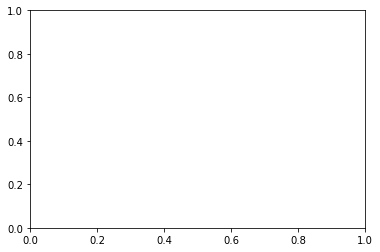

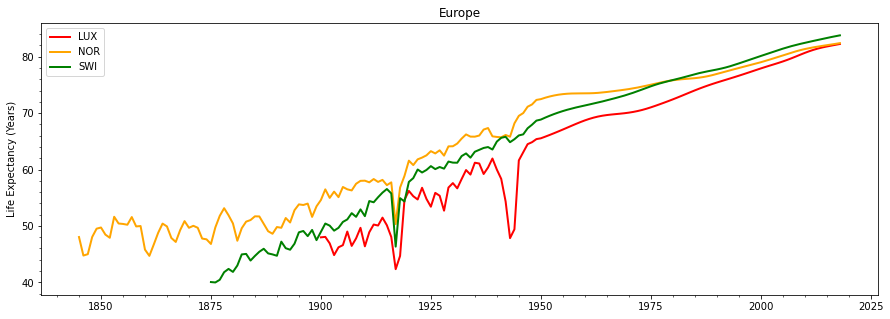

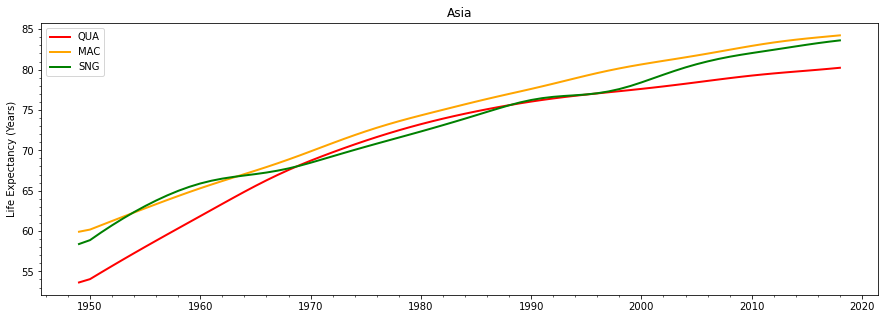

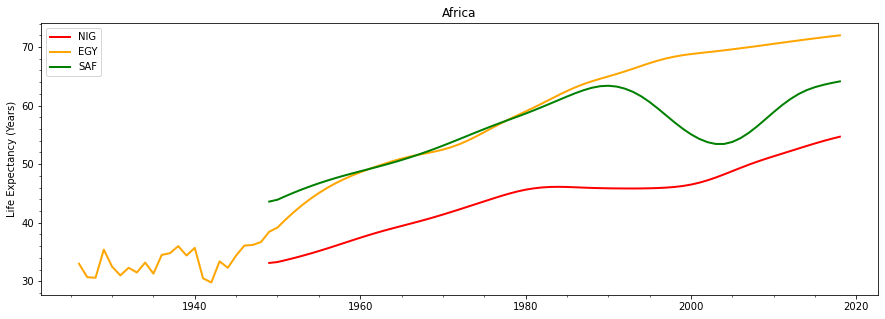

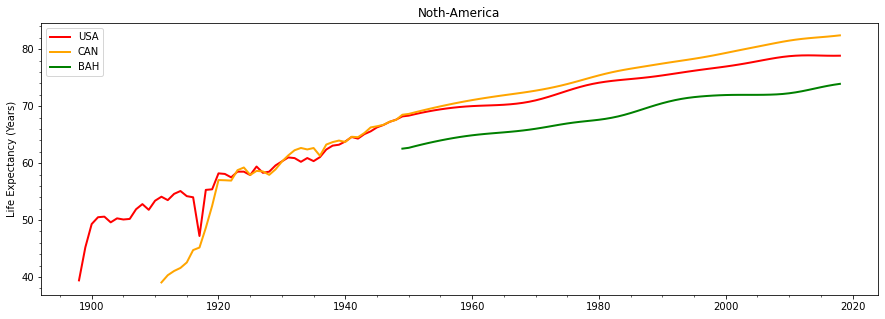

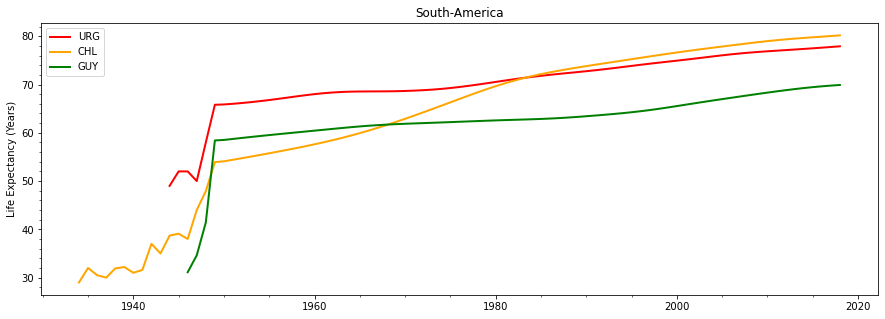

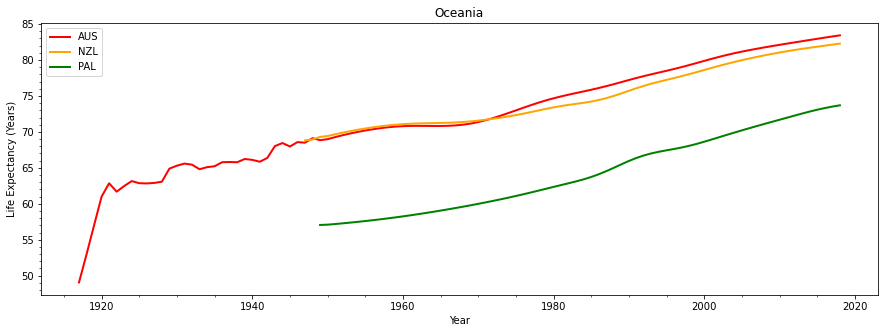

In [158]:
###Plot Data 

##SUBPLOT 1 - EUROPE
mpy.subplot()

#Input Values
yearLUX_xvalues = yearsLUX
yearNOR_xvalues = yearsNOR
yearSWI_xvalues = yearsSWI
lux_yvalues = LUX_le
nor_yvalues = NOR_le
swi_yvalues = SWI_le
mpy.figure(figsize=(15,5))

#Plot Data 
plot_lux = mpy.plot(yearLUX_xvalues, lux_yvalues, linewidth = 2, color= 'red', )
plot_nor = mpy.plot(yearNOR_xvalues, nor_yvalues, linewidth = 2, color= 'orange')
plot_swi = mpy.plot(yearSWI_xvalues, swi_yvalues, linewidth = 2, color= 'green')
mpy.legend(['LUX', 'NOR', 'SWI'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Europe')
#-------------------------------------------------------------------------------------------------
##SUBPLOT 2 - ASIA
mpy.subplot()

#Input Values
yearQUA_xvalues = yearsQUA
yearMAC_xvalues = yearsMAC
yearSNG_xvalues = yearsSNG
qua_yvalues = QUA_le
mac_yvalues = MAC_le
sng_yvalues = SNG_le
mpy.figure(figsize=(15,5))

#Plot Data 
plot_qua = mpy.plot(yearQUA_xvalues, qua_yvalues, linewidth = 2, color= 'red', )
plot_mac = mpy.plot(yearMAC_xvalues, mac_yvalues, linewidth = 2, color= 'orange')
plot_sng = mpy.plot(yearSNG_xvalues, sng_yvalues, linewidth = 2, color= 'green')
mpy.legend(['QUA', 'MAC', 'SNG'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Asia')
#-------------------------------------------------------------------------------------------------
##SUBPLOT 3 - AFRICA
mpy.subplot()

#Input Values
yearNIG_xvalues = yearsNIG
yearEGY_xvalues = yearsEGY
yearSAF_xvalues = yearsSAF
nig_yvalues = NIG_le
egy_yvalues = EGY_le
saf_yvalues = SAF_le
mpy.figure(figsize=(15,5))

#Plot Data 
plot_nig = mpy.plot(yearNIG_xvalues, nig_yvalues, linewidth = 2, color= 'red', )
plot_egy = mpy.plot(yearEGY_xvalues, egy_yvalues, linewidth = 2, color= 'orange')
plot_saf = mpy.plot(yearSAF_xvalues, saf_yvalues, linewidth = 2, color= 'green')
mpy.legend(['NIG', 'EGY', 'SAF'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Africa')
#-------------------------------------------------------------------------------------------------
##SUBPLOT 4 - NORTH-AMERICA
mpy.subplot()

#Input Values
yearUSA_xvalues = yearsUSA
yearCAN_xvalues = yearsCAN
yearBAH_xvalues = yearsBAH
usa_yvalues = USA_le
can_yvalues = CAN_le
bah_yvalues = BAH_le
mpy.figure(figsize=(15,5))

#Plot Data 
plot_usa = mpy.plot(yearUSA_xvalues, usa_yvalues, linewidth = 2, color= 'red', )
plot_can = mpy.plot(yearCAN_xvalues, can_yvalues, linewidth = 2, color= 'orange')
plot_bah = mpy.plot(yearBAH_xvalues, bah_yvalues, linewidth = 2, color= 'green')
mpy.legend(['USA', 'CAN', 'BAH'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Noth-America')
#-------------------------------------------------------------------------------------------------
##SUBPLOT 5 - SOUTH-AMERICA
mpy.subplot()

#Input Values
yearURG_xvalues = yearsURG
yearCHL_xvalues = yearsCHL
yearGUY_xvalues = yearsGUY
urg_yvalues = URG_le
chl_yvalues = CHL_le
guy_yvalues = GUY_le
mpy.figure(figsize=(15,5))

#Plot Data 
plot_urg = mpy.plot(yearURG_xvalues, urg_yvalues, linewidth = 2, color= 'red', )
plot_chl = mpy.plot(yearCHL_xvalues, chl_yvalues, linewidth = 2, color= 'orange')
plot_guy = mpy.plot(yearGUY_xvalues, guy_yvalues, linewidth = 2, color= 'green')
mpy.legend(['URG', 'CHL', 'GUY'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.ylabel('Life Expectancy (Years)')
mpy.title('South-America')
#-------------------------------------------------------------------------------------------------
##SUBPLOT 6 - OCEANIA
mpy.subplot()

#Input Values
yearAUS_xvalues = yearsAUS
yearNZL_xvalues = yearsNZL
yearPAL_xvalues = yearsPAL
aus_yvalues = AUS_le
nzl_yvalues = NZL_le
pal_yvalues = PAL_le
mpy.figure(figsize=(15,5))

#Plot Data 
plot_aus = mpy.plot(yearAUS_xvalues, aus_yvalues, linewidth = 2, color= 'red', )
plot_nzl = mpy.plot(yearNZL_xvalues, nzl_yvalues, linewidth = 2, color= 'orange')
plot_pal = mpy.plot(yearPAL_xvalues, pal_yvalues, linewidth = 2, color= 'green')
mpy.legend(['AUS', 'NZL', 'PAL'], ncol=1, loc='upper left')
mpy.minorticks_on()
mpy.xlabel('Year')
mpy.ylabel('Life Expectancy (Years)')
mpy.title('Oceania')

The 1950s show that it was a prosperous decade. Due to the ending of WW2, the world, as a collective, was able to invest in advancing healthcare, exploration, technology and more. 

The amount of money and time that was saved from the destructive world wars led to the fasted advancement in human history.
This is again reflected by the graphs above, the world's average life expectancy has grown, and hasn't experienced any significant hiccups in the last 70 years (circa 2020). 

South Africa within the Africa group dropped ~1994, and it took until 2019 for the life expectancy to reach ~64-year mark again. Even Nigeria had been affected by this but wasn't as significant as South Africa. The possible reasoning behind the dips could be related to the high amount of TB and HIV within most countries in Africa, even though Nigeria has been affected by this, South Africa is one of the largest victims to TB/HIV.

Countries categorised in the 'First World' are leading in terms of overall life expectancy, due to having the highest investments in healthcare and technology, as well as, offering the best quality of life to its citizens. For example, USA, CAN and BAH are in the same continent, yet, BAH seems to be lagging relative to the average life expectancy. USA and CAN have similar life expectancies and have had a 1:1 life expectancy rate throughout history. 

In Oceania, AUS and NZL have life expectancies similar to Europe, Asia and North America, maintaining a consolidated, positive trend. Yet, PAL's life expectancy is behind by ~10 years, this is a significant drop, and the scale of this is visualised above. 
- AUS - Total GDP: $1.397 trillion

- NZL - Total GDP: $206.9 billion

- PAL - Total GDP: $268.4 million

We can see that from the total GDP, PAL is behind NZL by a drastic amount, a poorer nation will have the less financial freedom to invest into healthcare and make the quality of life for the people, as a  whole, less adequate than AUS, for example, a nation with a lot of financial strength to invest into its institutions and people. 